<h1>Floating point numbers</h1>

<h2>Decimal numbers</h2>

<p>In mathematics we have different types of numbers: Integers, Rationals, Reals, Complex, ...</p>

<p>For a minute, lets focus on integers.</p>

<p>There are infinitely many integers mathematically, but only finitely many representable on the computer.</p>

<p>On the computer there may be more than one storage type for each mathematical type, For example, <code>Julia</code> has <a href="http://julia.readthedocs.org/en/latest/manual/integers-and-floating-point-numbers/">12</a> built in types for integers (signed and unsigned and different storage sizes.)</p>

<h3></h3>

<p><code>Int64</code> is typical. <code>Int8</code> has only $256=2^8$ possible values. It uses $-2^7$ to $2^7-1$.</p>

<p>Internally, the values are kept in binary:</p>

In [1]:
convert(Int8, 5) |> bits

<p>The leading $0$ indicates the sign. </p>

<h3>Binary numbers</h3>

<p>Binary numbers use powers of $2$, not $10$. So – as you likely know – $1101$ in binary is just $1\cdot 2^0 + 0\cdot 2^1 + 1 \cdot 2^2 + 1\cdot 2^3 = 13$.</p>

<p>The largest value in <code>Int8</code> would then be $1 + 2 + 4 + 8 + 16 + 32 + 64 = 127$.</p>

<h3>Converting binary to decimal</h3>

<p>It is easy to convert binary to decimal: we just mentally use powers of 2 instead of 10.</p>

<p>Here is some code:</p>

In [1]:
x = "1101101100"
out = [ parse(Int, x[length(x) - i])* 2^i for i in 0:(length(x) - 1)]

10-element Array{Int64,1}:
   0
   0
   4
   8
   0
  32
  64
   0
 256
 512

<p>and we just add</p>

In [1]:
sum(out)

876

<h3>Converting decimal in integer to binary</h3>

<p>Start with an integer $n$. we generate the value of <code>x</code> from left to right. Suppose $n\geq 2$.</p>

<p>First find $p$ with $2^p \leq n < 2^{p+1}$. The number will have $p+1$ digits, and the left most one will be $1$.</p>

<p>Then consider $n = n - 2^p$. Apply the same to this. Repeat.</p>

In [1]:
n = 27
log2(n) # 4. So x = 1XXXX

4.754887502163468

In [1]:
n = n - 2^4
log2(n) # 3. So x = 11XXX

3.4594316186372973

In [1]:
n = n - 2^3
log2(n) # 1 So x = 1101X

1.584962500721156

In [1]:
n = n - 2^1 ## smaller than 2, so clearly x = 11011

1

<p>and check:</p>

In [1]:
x = "11011"
sum( parse(Int, x[length(x) - i])* 2^i for i in 0:(length(x) - 1) )

27

<h3>Math with binary numbers</h3>

<p>Adding two binary numbers follows the usual algorithm with carrying:</p>

<pre>  1101
+ 1011
------
 11000  
</pre>

$(1 + 4 + 8 + 1 +2 + 8 = 16 + 8)$

<h3>Multiplication</h3>

<p>In decimal multiplying or dividing  by 10 is easy – add a $0$ or shift the decimal point. Similarly with binary:</p>

<pre>   10101
*     10
--------
   00000
  10101
--------
  101010
</pre>

<h3>Negative numbers</h3>

<p>How are negative numbers stored?</p>

In [1]:
bits(convert(Int8, 5)),  bits(convert(Int8, -5))

("00000101", "11111011")

<p>They are quite different!</p>

<h3>two's complement</h3>

<p>The storage uses <a href="http://tinyurl.com/855yrz2">two's</a> complements. Basically $-x$ is stored as $2^n-x$.</p>

<p>We have $n$ bits ($n=8$ in our example, $64$ is typical, though $32$ may be for older machines). Positive numbers use the first $n-1$ which is why there the largest number is $2^{n-1} + 2^{n-2} + \cdots 2 + 1 = 2^n-1$.</p>

<p>It could be that the last bit could just be a sign bit, but instead of that, the values for negative numbers are stored in a different format. $-x$ ($x>0$) is stored as $2^n-x$.</p>

<h3>Carry</h3>

In [1]:
bits(convert(Int8, 5)),  bits(convert(Int8, -5))  

("00000101", "11111011")

<pre>11111111    (Carry)
 00000101   (5=1*1 + 0*2 + 1*4)
 11111011   (2^8-5 = 251 = 1 + 2 + 8 + 16+32 + 64 +128
---------
100000000
</pre>

<h3>Why</h3>

<p>This makes addition easy, as illustrated above. Or here with 15 + (-5)</p>

<pre>11111111    (Carry)
 00001111   (15=1*1 + 1*2 + 1*4+1*8)
 11111011   (2^8-5 = 251 = 1 + 2 +...+ 64 +128
---------
100001010
</pre>

<p>And <code>00001010</code> $ = 2 + 8 = 10$.</p>

<h3>multiplying and shifting</h3>

<p>Let's see what happens with powers of 2:</p>

In [1]:
bits(2)

In [1]:
bits(2 * 2)

In [1]:
bits(2 * 2^2)

<p>and ...</p>

In [1]:
bits(2^62)

<p>and we go over the edge...</p>

In [1]:
bits(2 * 2^62)

<p>The largest value is</p>

In [1]:
bits(typemax(Int64))

<p>Which is $2^{63} - 1$.</p>

<p>Integers are stored exactly – as possible. But that has limitations. With 64 bit numbers, the largest integer is $2^{63}-1 = 1 + 2 + \cdots + 2^{62}$:</p>

In [1]:
sum(2^i for i in 0:62) |> bits

<p>but not <code>2^63</code>:</p>

In [1]:
2^63

-9223372036854775808

<p>Though this works:</p>

In [1]:
bits(2^63-1)

<p>What happens:</p>

In [1]:
bits(2)

In [1]:
bits(2*2)

<p>shifts things left</p>

In [1]:
bits(2^62)

In [1]:
bits(2^62 + 2^61)

In [1]:
bits(2^62 * 2)

<p>But still this is correct:</p>

In [1]:
bits(2^63 - 1)

<h2>Decimal numbers</h2>

<p>On a calculator there is one basic number type: floating point. This is primarily the case with computers as well.</p>

<p>In mathematics we primarily work with <em>decimal numbers</em></p>


$$
12.34 = 1 \cdot 10^2 + 2 \cdot 10^1 + 3\cdot 10^{-1} + 4 \cdot 10^{-2}
$$


<h3>Scientific notation</h3>

<p>We can write a real number in terms of powers of 10. For example:</p>


$$
1.234 = 1.234 \cdot 10^0 =  12.34 \cdot 10^{-1} =  .1234 \cdot 10^1 = \cdots
$$


<p>We can use normalized scientific notation to say that we can express $x$ by three quantities:</p>


$$
x = \pm r \cdot 10^n
$$


<ul>
<li><p>The $\pm$ is $+1$ or $-1$ and records the sign of $x$</p>
</li>
<li><p>the $r$ is a number in $0.1 \leq r < 1.0$</p>
</li>
<li><p>the $n$ is an integer, possibly negative, or zero.</p>
</li>
</ul>

<h2>scientific notation with different bases</h2>

<p>We can use different bases in scientific notation. A number would be represented with</p>


$$
x = \pm q \cdot \beta^m
$$


<p>We can normalize the number by insisting $q=0.ddddd...$ where the leading term is non-zero.</p>

<p>A special case would be $\beta =2$ or base 2, which forces the leading term to be 1. In that case, a special case could be $q=1.dddddd...$.</p>

<h3>Converting decimal to binary</h3>

<p>We can convert decimal numbers to binary. The same simple algorithm for integers works with some modification. Start with $x$. We want to produce digits $ddd.ddd...$ where $d$ are either $0$ or $1$.</p>

<p>First, take the log base 2:</p>

In [1]:
x = 12.1
log2(x) |> floor

3.0

<p>This says $2^3 \leq x < 2^4$. Remember $3$, then subtract $2^3$ and repeat:</p>

In [1]:
ds = [3]
x = x - 2.0^ds[end]
n = log2(x) |> floor

2.0

<p>Remember 2 and then subtract $2^2$ and repeat:</p>

In [1]:
push!(ds, n)
x = x - 2.0^ds[end]
n = log2(x) |> floor

-4.0

<p>Remember $-4$ and repeat</p>

In [1]:
push!(ds, n)
x = x - 2.0^ds[end]
n = log2(x) |> floor

-5.0

<p>etc.</p>

<p>The <code>ds</code> will tell us there is a 1 in position 3,2,-4, -5, 8,9... So <code>1100.000110011...</code></p>

<p>One thing to note: what numbers terminate in decimal are generally different than what numbers will terminate in binary.</p>

<h2>Floating point numbers</h2>

<p>Floating point is a representation of numbers using scientific notation. Only there are constraints on the sizes:</p>

<ul>
<li><p>The value $q$, the significand, has $p$ digits. (The precision)</p>
</li>
<li><p>The values of $m$ is between two values, say $e_{min}$ and $e_{max}$.</p>
</li>
</ul>

<h3>A simple case</h3>

<p>For example consider base $\beta=10$, $p=3$ and $e_{min}=-1$ and $e_{max}=2$. Then the possible values are limited to $-9.99 \cdot 10^{-1}$ to $9.99 \cdot 10^2$. How many are there?</p>


$$
2 \cdot ((\beta-1)\cdot\beta^{p-1}) \cdot (e_{max} - e_{min})
$$


<h2>Binary floating point</h2>

<p>For binary floating point, things are similar. For <em>simplicity</em> let's look at 16-bit floating point where</p>

<ul>
<li><p>1 bit is the sign bit <code>0</code> = $+1$, <code>1</code> is $-1$</p>
</li>
<li><p>the $q$ is represented with $10$ bits (the <em>precision</em> is 10)</p>
</li>
<li><p>the $m$ is represented with $5$ bits.</p>
</li>
</ul>

<p>There is nothing to represent the <em>sign</em> of $m$. The trick is offset the value by subtracting and using  $m -15$. (Here $15 = 2^{5-1}-1$.)</p>

<p>With this, can we represent some numbers:</p>

<p>What is $1$? It is $+1 \cdot 1.0 \cdot 10^{15 - 15}$. So we should have</p>

<ul>
<li><p>the sign is <code>0</code></p>
</li>
<li><p>the $q$ is <code>0000000000</code></p>
</li>
<li><p>the $m$ is <code>01111</code></p>
</li>
</ul>

<p>Checking we have</p>

In [1]:
convert(Float16, 1.0) |> bits

<h3></h3>

<p>Kinda hard to see: Let's wrap this in a function:</p>

In [1]:
function seebits(x)
  b = bits(convert(Float16,x))
  b[1:1], b[2:6], b[7:end]
end

seebits (generic function with 1 method)

In [1]:
seebits(1)

("0", "01111", "0000000000")

<h3></h3>

<p>We have $2 = 1.0 \cdot 2^1$. Se we expect $q$ to represent $0$ and $m$ to represent $16$, as $16-15 = 1$:</p>

In [1]:
seebits(2)

("0", "10000", "0000000000")

<p>What about the sign bit?</p>

In [1]:
seebits(-2)

("1", "10000", "0000000000")

<h3></h3>

<p>What about other numbers</p>

In [1]:
seebits(1 + 1/2 + 1/4 + 1/8 + 0/16 + 1/32)

("0", "01111", "1110100000")

In [1]:
seebits(2^4*(1 + 1/2 + 1/4 + 1/8 + 0/16 + 1/32)) ## 19 - (1 + 1*2 + 1*16) = 0

("0", "10011", "1110100000")

<h2>Zero and other "special" numbers</h2>

<p>Wait a minute – if we insist on the significand being $1.dddd...$ we can't represent $0$!</p>

<p>Some values in floating point are special:</p>

<ul>
<li><p>What is $0$? how to write $0$ in $1.dddd \cdot 2^m$? Can't do it. So it is coded:</p>
</li>
</ul>

In [1]:
bits(zero(Float16))

<p>(The code uses the <em>smallest</em> possible exponent, and $0$ for the significand)</p>

<ul>
<li><p>What is $-0$? By flipping the sign bit, we could code $-0$ naturally. Is it done?</p>
</li>
</ul>

In [1]:
bits(-zero(Float16))   ## why??

<h3>"Infinity": Inf</h3>

<p>Infinity. <a href="http://www.cs.berkeley.edu/~wkahan/Infinity.pdf">Why</a>?</p>

<p>This value is deemed valuable to have supported at the hardware level. It is coded by reserving the <em>largest</em> possible value of $m$ and $0$ for the significand.</p>

In [1]:
bits(Inf16)  

<p>There is room for $-\infty$ and it too is defined:</p>

In [1]:
bits(-Inf16)

<h3>Not a number: NaN</h3>

<p>NaN. This is a special value reserved for computations where no value is possible. Examples include <code>0/0</code> or <code>0 * Inf</code>:</p>

In [1]:
0/0, 0 * Inf

(NaN, NaN)

<p>These are related to limit problems (indeterminate), though not all forms are indeterminate:</p>

In [1]:
1/0, 0^0

(Inf, 1)

<p>How is <code>NaN</code> coded:</p>

In [1]:
bits(NaN16)

<p>This is <em>very</em> similar to <code>Inf</code>, but the value of $q$ is non-zero!</p>

In [1]:
seebits(NaN16), seebits(Inf16)

(("0", "11111", "1000000000"), ("0", "11111", "0000000000"))

<p><code>NaN</code> semantics are a bit <a href="https://github.com/JuliaLang/julia/issues/7866">controversial</a>.</p>

<h3>Poison</h3>

<p>The values of <code>Inf</code> and <code>NaN</code> will "poison" subsequent operations, for example</p>

In [1]:
NaN + 1, Inf - 1

(NaN, Inf)

<p>These special values are generated instead of errors being thrown for some common cases:</p>

<ul>
<li><p>overflow (a number bigger than the largest finite floating point number)</p>
</li>
<li><p>divide by $0$ (either <code>Inf</code>, or if <code>0/0</code>, <code>NaN</code>)</p>
</li>
<li><p>invalid number (such as <code>0 * Inf</code>)</p>
</li>
</ul>

<p>(Whether something like <code>sqrt&#40;-1.0&#41;</code> is an error or <code>NaN</code> is not specified.)</p>

<h3>Range of numbers</h3>

<p>What is the range of the numbers that can be represented? Let's check with Float16.</p>

<p>The largest <em>positive</em> value would have $m$ coded with <code>11110</code> or ($2 + 4 + 8 + 16 - 15 = 15$) (The value <code>11111</code> is saved for <code>Inf</code> and <code>NaN</code>.)</p>

<p>The largest value for $q$ would be <code>1111111111</code>, or</p>

In [1]:
sum([1/2^i for i in 0:10])

1.9990234375

<p>Altogether we have:</p>

In [1]:
sum([1//2^i for i in 0:10]) * 2^15

65504//1

<p>Is this right?</p>

In [1]:
prevfloat(typemax(Float16))

Float16(6.55e4)

<p>For the smallest <em>positive</em> number, the smallest exponent is code <code>00000</code> or $0 - 15 = -15$. So the value should be:</p>

In [1]:
1/2^15

3.0517578125e-5

<p>But this isn't actually the case:</p>

In [1]:
nextfloat(convert(Float16, 0))

Float16(6.0e-8)

<p>(As there are tricks to get smaller numbers called subnormal numbers)</p>

<p>For double precision numbers (Float64) the values are given by:</p>

In [1]:
prevfloat(Inf), nextfloat(0.0)

(1.7976931348623157e308, 5.0e-324)

<h2>Rounding</h2>

<p>We are familiar with the task of rounding: a passing grade is 59.5 not a 60!</p>

<p>We have three types of rounding: round up, round down, mixing based on a rule.</p>

<p>Rounding to the nearest integer shows this fairly clearly:</p>

In [1]:
x = 3.14
ceil(x), floor(x), round(x)

(4.0, 3.0, 3.0)

<p>The same would be true of $3.1$, as that is all that is looked at here.</p>

<p>What becomes of $1.5$? The default is to round up.</p>

In [1]:
x = 1.5
ceil(x), floor(x), round(x)

(2.0, 1.0, 2.0)

<p>Rounding can be done for real numbers too to some specified number of digits:</p>

In [1]:
x = 1.23456
round(x,1), round(x,2), round(x,4)

(1.2, 1.23, 1.2346)

<h3>Rounding in floating point</h3>

<p>When converting from decimal to floating point, even simple decimal numbers get rounded!</p>

In [1]:
convert(Float16, 0.1)

Float16(0.1)

In [1]:
seebits(0.1)

("0", "01011", "1001100110")

<p>"1001100110" becomes:</p>

In [1]:
q = (1 + 1/2 + 1/16 + 1/32 + 1/256 + 1/512 )

1.599609375

<h3></h3>

<p>And <code>01011</code> for $m$ becomes</p>

In [1]:
m = 1 + 2 + 8 - 15

-4

In [1]:
1 * q * 2.0^m

0.0999755859375

<p>Notice the number $0.1$ is necessarily approximated.</p>

<h3>Error bound</h3>

<p>Let $x$ be the number and $\tilde{x}$ be its rounded value. How big is the difference when $x$ is rounded to $n$ decimal places?</p>

<p>We consider the value of the $n+1$st decimal number.</p>

<ul>
<li><p>If it is in 0,1,2,3,4 then we round down and the error is $i \cdot 10^{-(n+1)}$</p>
</li>
<li><p>If it is in 5,6,7,8,9 then we round up, and the error is $10-i \cdot 10^{-(n+1)}$.</p>
</li>
</ul>

<p>In either case, it is less –in absolute value – than $(10/2) \cdot 10^{-(n+1)} = 1/2 \cdot 10^{-n}$.</p>

<blockquote>
<p>The error in rounding to $n$ decimal points is bounded by: $|x - \tilde{x}| < 1/2 \cdot 10^{-n}$.</p>
</blockquote>

<p>Had we chopped (<code>floor</code>) or always rounded up (<code>ceil</code>) then the error is bounded by $10^{-n}$.</p>

<h3>Ulp</h3>

<p>There is an alternate name for the error. When rounding to a certain number of digits, there is a unit of last precision, and <code>ulp</code>. In the above, the unit of last precision was $10^{-n}$, so the error is less than $1/2$ <code>ulp</code>.</p>

<p><code>ulp</code>s are easy enough to understand. If we round $3.1415$ to $3.14$ then the error is $0.15$ <code>ulp</code>.</p>

<h3>How much off can rounding be?</h3>

<p>In binary floating point, the unit of last precision is $2^{-p}$, so the error in rounding is at most $(1/2) \cdot 2^{-p}$, or half an <code>ulp</code>.</p>

<h3>Float16, Float32, Float64, ...</h3>

<p>16-bit floating point is not typical. What is common is:</p>

<ul>
<li><p>64-bit floating point (in Julia <code>Float64</code>)</p>
</li>
<li><p>32-bit floating point (older hardward and OSes)</p>
</li>
</ul>

<p>How the bits are arranged in IEEE 754 binary formats for <a href="http://tinyurl.com/76kpk6s">floating point</a> we have this <a href="http://tinyurl.com/76kpk6s">table</a>. See also this post by John <a href="http://www.johndcook.com/blog/2009/04/06/anatomy-of-a-floating-point-number/">Cook</a> for the common case.</p>

<p>For example</p>

In [1]:
b = bits(2^2 + 2^0 + 1/2 + 1/8) ## 101.101 = 1.01101 * 2^2
b[1:1], b[2:12], b[13:end]

("0", "10000000001", "0110100000000000000000000000000000000000000000000000")

<p>Here $m = 2^{10} + 1 - (2^{10} - 1)$ and we can see that $q=1.01101$ with the first $1$ implicit.</p>

<h2>Machine numbers</h2>

<p>The numbers that can be represented <strong>exactly</strong> in floating point are called <em>machine numbers</em>.</p>

<p>| There aren't very many compared to the <strong>infinite</strong> number of floating point values.</p>

<p>Let's visualize in a <em>hypothetical</em> Float8 mode with 1 sign bit, 3 exponent bits and 4 bits for the mantissa.</p>

<p>The possible <em>positive</em> values are</p>

In [1]:
qs = [1 + i/2 + j/4 + k/8 + l/16 for i in 0:1, j in 0:1, k in 0:1, l in 0:1] |> vec |> sort

16-element Array{Float64,1}:
 1.0   
 1.0625
 1.125 
 1.1875
 1.25  
 1.3125
 1.375 
 1.4375
 1.5   
 1.5625
 1.625 
 1.6875
 1.75  
 1.8125
 1.875 
 1.9375

<p>The values for the exponents are $-2, -1, 0, 1, 2, 3$. So all our values are given by</p>

In [1]:
ms = (-2):3
vals = [q * 2.0^m for q in qs, m in ms] |> vec

96-element Array{Float64,1}:
  0.25    
  0.265625
  0.28125 
  0.296875
  0.3125  
  0.328125
  0.34375 
  0.359375
  0.375   
  0.390625
  0.40625 
  0.421875
  0.4375  
  0.453125
  0.46875 
  0.484375
  0.5     
  0.53125 
  0.5625  
  0.59375 
  0.625   
  0.65625 
  0.6875  
  0.71875 
  0.75    
  0.78125 
  0.8125  
  0.84375 
  0.875   
  0.90625 
  0.9375  
  0.96875 
  1.0     
  1.0625  
  1.125   
  1.1875  
  1.25    
  1.3125  
  1.375   
  1.4375  
  1.5     
  1.5625  
  1.625   
  1.6875  
  1.75    
  1.8125  
  1.875   
  1.9375  
  2.0     
  2.125   
  2.25    
  2.375   
  2.5     
  2.625   
  2.75    
  2.875   
  3.0     
  3.125   
  3.25    
  3.375   
  3.5     
  3.625   
  3.75    
  3.875   
  4.0     
  4.25    
  4.5     
  4.75    
  5.0     
  5.25    
  5.5     
  5.75    
  6.0     
  6.25    
  6.5     
  6.75    
  7.0     
  7.25    
  7.5     
  7.75    
  8.0     
  8.5     
  9.0     
  9.5     
 10.0     
 10.5     
 11.0     
 11.5     
 12

<h3>Plotting the machine numbers</h3>

<p>We can plot these points:</p>

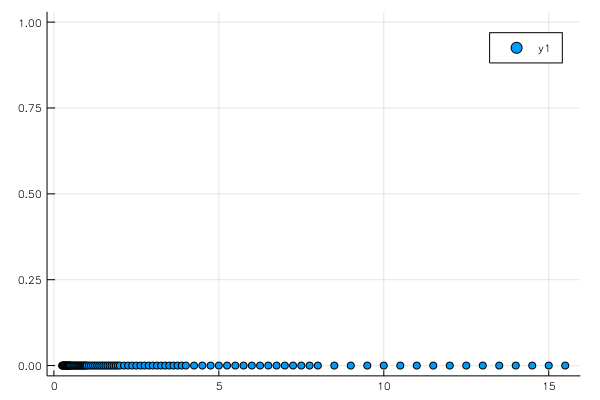

In [1]:
using Plots
scatter(vals, 0*vals)

<p>We notice:</p>

<ul>
<li><p>they are definitely finite</p>
</li>
<li><p>there are definitely gaps</p>
</li>
<li><p>they are not evenly spaced out</p>
</li>
<li><p>there is a "hole" near 0</p>
</li>
</ul>

<h3>Machine precision</h3>

<p>Of special note is the size of the gap between values around 1:</p>

In [1]:
nextfloat(1.0), nextfloat(1.0) - 1.0

(1.0000000000000002, 2.220446049250313e-16)

<p>This is sometimes called <em>machine precision</em> and in <code>Julia</code> is returned by <code>eps&#40;&#41;</code>:</p>

In [1]:
eps()

2.220446049250313e-16

In [1]:
eps(Float16)

Float16(0.000977)

<p>In floating point, <code>1.0 &#61; 1.000...000 * 2^0</code> where there are <code>k</code> zeros in the mantissa. The next floating point value is `1.000...001 * 2^0$ so the differcne is the $2^{-k}$. </p>

<p><a href="https://en.wikipedia.org/wiki/Floating-point_arithmetic">FloatingPoint</a> has $k=10$ for 16-bit, $k=23$ for 32 bit and $k=52$ for 64 bit.</p>